# Overview
In this notebook we explore the concept of conditional probability and conditional probability distributions.

# Prerequisites
- [Joint Probability](Joint%20Probability.ipynb)

# 1. Conditional Probability

As the name suggests, a conditional probability is a probabilitiy measure for the occurance of someevent given that some other event has already occurred.

## 1.1. Definition
The mathematical definition is typically expressed using the following equation:

$$ P(A|B) = \frac{P(B \cap A)}{P(B)} $$

Where $A \cap B = B \cap A$ and represents the intersection of the events A and B (A and B occur simultaneously).

$$ \Rightarrow P(A \cap B) = P(A|B)P(B) = P(B|A)P(A) $$

## 1.2. Bayes Theorem

Bayes Theorem provides an alternate equality to mathematically quantify a conditional probability between two variables:

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

The following terminology has been applied to the terms above:

- $P(A|B)$: Posterior probability
- $P(A)$: Prior probability
- $P(B|A)$: Likelihood
- $P(B)$: Evidence

This allows Bayes Theorem to be restated as:

$$ Posterior = \frac{Likelihood * Prior}{Evidence} $$

More information on Bayes Theorem and conditional probability can be found [here](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/).

## 1.3. Example: Smoke and Fire
Let A be the the event that a fire exists. Let B be the event that smoke exists.

We multiply the probability that fire creates smoke by the probability of fire. This gives us a measurement for how likely that a fire is currently producing smoke. We divide this by the probability that smoke currently exists. 

This scaling effectively brings things back into the terms of smoke, and as the equality states, gives us the probability that fire exists given smoke currently exists.



More examples: http://www.stat.yale.edu/Courses/1997-98/101/condprob.htm

# 2. Conditional Probability Distributions

As with any probability, a conditional probability can be represented by a probability density function or a cumulative distribution function. Looking at the definition of conditional probability we see that a conditional probability can be derived using a joint distribution and a marginal distribution.

## 2.1. Intuition For Conditional Probability Distributions

A conditional probability is one that expresses the probability of an outcome A given that an outcome B has already occured. This is expressed mathematically as $p(A|B)$.

It is possible to derive a conditional probability distribution from a joint distribution. Using the definition of conditional probability we have:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

Recall the relationship between union ($\cup$) and intersection ($\cap$) shown visually below:

<table>
    <tr>
        <td>
            <img src='images/a_union_b.png' height='200px' width='200px'>
        </td>
        <td>
            <img src='images/a_intersect_b.png' height='200px' width='200px'>
        </td>
    </tr>
</table>

For example, looking at the bi-variate example from the previous section, we could take a slice (either vertically or horizontally) such that one of the variables is frozen at a given value. Below we see a multivariate joint distribution for a non-independent pair of variables in the bottom left and the coresponding univariate marginal probability density functions for each variable.

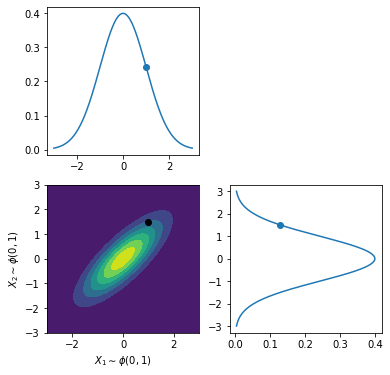

In [4]:
import numpy
import scipy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8,1]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots(2, 2)
fig.set_figwidth(6)
fig.set_figheight(6)

# Hide the unused subplot
ax[0][1].axis('off')

# Plot the pdf for X1 and X2
x = numpy.linspace(-3, 3, 200)
dist = scipy.stats.norm(loc=0, scale=sigma[0][0])
y = dist.pdf(x)
ax[0][0].plot(x, y)
ax[0][0].scatter(1, dist.pdf(1))

x = numpy.linspace(-3, 3, 200)
dist = scipy.stats.norm(loc=0, scale=sigma[1][1])
y = dist.pdf(x)
ax[1][1].plot(y, x)
ax[1][1].scatter(dist.pdf(1.5), 1.5)


#ax[1][0].set_title('Joint probability distribution with high coavairnace', pad=20)
ax[1][0].set_xlabel('$X_1 \sim \phi(0, 1)$')
ax[1][0].set_ylabel('$X_2 \sim \phi(0, 1)$')
#pyplot.xlim([-3, 3])
#pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax[1][0].contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
#color_bar = pyplot.colorbar(contour, ax=ax[1][0])
ax[1][0].scatter(1,1.5,c='black');

We will take a vertical slice and fix $X_1$ with a value of 1 to look at how the probability distribution has shifted.

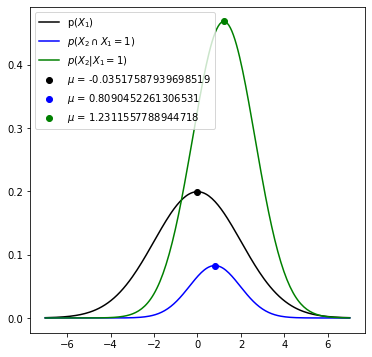

In [2]:
import numpy
import scipy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8,2]])
rv = multivariate_normal(mu, sigma)

# Generate a number line
x = numpy.linspace(-7, 7, 200)

# Generate probabilities for the first random variable
normal_uv_rv = scipy.stats.norm(loc=0, scale=2)
p1 = normal_uv_rv.pdf(x)
x_1 = 1
p_x_1 = normal_uv_rv.pdf(x_1)

# Generate joint probabilities with a fixed X_1
x2 = x.copy()
grid_coord = numpy.column_stack((numpy.full(x2.shape, 1), x2))
p_x2_and_x1 = rv.pdf(grid_coord)

# Generate conditional probabilities given a fixed X_1
p_x2_given_x1 = p_x2_and_x1 / p1

# Calculate the means of the distributions
i = numpy.argmax(p1)
p1_mean_x = x[i]
p1_mean = p1[i]
i = numpy.argmax(p_x2_and_x1)
p_x2_and_x1_mean_x = x[i]
p_x2_and_x1_mean = p_x2_and_x1[i]
i = numpy.argmax(p_x2_given_x1)
p_x2_given_x1_mean_x = x[i]
p_x2_given_x1_mean = p_x2_given_x1[i]

# Plot
fig, ax = pyplot.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)
ax.plot(x, p1, c='black')
ax.plot(x, p_x2_and_x1, c='blue')
ax.plot(x, p_x2_given_x1, c='green')
ax.scatter(p1_mean_x, p1_mean, c='black')
ax.scatter(p_x2_and_x1_mean_x, p_x2_and_x1_mean, c='blue')
ax.scatter(p_x2_given_x1_mean_x, p_x2_given_x1_mean, c='green')
ax.legend([
    "p($X_1)$", 
    "$p(X_2 \cap X_1=1)$", 
    "$p(X_2|X_1=1)$",
    "$\mu$ = {0}".format(p1_mean_x),
    "$\mu$ = {0}".format(p_x2_and_x1_mean_x),
    "$\mu$ = {0}".format(p_x2_given_x1_mean_x)
]);

In the diagram above, we can see the the effects on the distributions as we fix a variable. We see that the distributions move to the right by looking at the means (visually indicated by the peaks) and we see that the distributions narrow by looking at the variance (visually indicated by the widths). The green distribution shows us the unconditional probability of $X_1$. This distribution will also describe the unconditional probability of $X_2$. We see this distribution of $X_2$ changes as we fix a value of $X_1=1$. 

Looking at the black distribution, we see that the probability of obtaining any value of $X_2$ and obtaining a value $X_1=1$ is generally smaller than obtaining the same value of $X_2$ independently. This intuitively makes sense as there is a smaller chance that two things happen at the same time. Intuitively this makes sense: we are multiplying a small number (smaller than one) by another small number... so we will get an even smaller number. We also see that the mean of the distribution has moved to the right. This indicates that the value $X_2$ is likely to take is somewhere around 1 rather than 0. Additionally we see that the variance of the distribution shrinks which indicates that the range of values that the variable is likely to take on is also shrinking (definition of variance).

Finally, with the green distribution, we see that the $X_2$ is most likely to take on a value of 1.23 given that $X_1=1$.

## 2.2. Deriving Conditional Distribution
The conditional distribution can be derived algebraically using the definition of conditional probability or Bayes Theorem seen below respectively:

$$ f_{A|B} = \frac{f_{B \cap A}}{f_{B}} = \frac{f_{B|A}f_A}{f_B} $$

Depending on the distribution the math will look different but it is basically a plug and play operation. In other words, we find two of the three functions in the formula, plug them in, and we have derived a soltuion.

In some cases we may not have an analytical solution and thus numerical methods can be combined to approximate a given distribution function.

### 2.2.1. Example Derevations
Below are links to rigorous derevations for distribution functions I have encountered.
- [Normal Distribution](./Normal%20Distribution/Normal%20Distribution.ipynb)

### 2.2.2. Visual Examples
In this section we look at visual examples which are derived numerically rather than analytically.

#### 2.2.2.1 Multivariate Gaussian Distribution

For example, assume we know the marginal distributions for two random variables $A$ and $B$ (by a priori belief or emperical observation):

$$ A \sim \mathcal{N}(\mu=2, \sigma=1) $$
$$ B \sim \mathcal{N}(\mu=1, \sigma=2) $$

We can formulate the join distribution as 

$$ A \cap B \sim \mathcal{N}(\mu_{A,B}, \Sigma_{A,B}) $$

**Note:** This formula was derived analytically. A proof can be seen here [here](http://noahgolmant.com/writings/derivationsunivariatemultivariate.pdf). With other distributions, the formula will be different. In some cases, a numerical method may be the only way to derive derive values forthe formula.

Expanding the equation prameters in matrix form we have

$$ \mu_{A,B}=\begin{bmatrix}
\mu_A \\
\mu_B
\end{bmatrix} $$

$$ \Sigma_{A,B}=\begin{bmatrix}
\sigma^2_A & \sigma_{A,B} \\
\sigma_{A,B} & \sigma^2_B
\end{bmatrix} $$

We know, or can derive all of these values except the covariance between the two variables

$$ \sigma_{A,B} = \mathbb{E}[AB] - \mathbb{E}[A]\mathbb{E}[B] $$
$$ = \mathbb{E}[AB] - \mu_A \mu_B $$

If we look at the formula for expected value, it is a numerical equation and must be calculated iteratively, and would require a numberical solution to calculate $\mathbb{E}[AB]$.

We will asssume $\sigma_{A,B} = 0$ for this example and caultulate the conditional probability distribution as follows:caultulate the conditional probability distribution as follows:

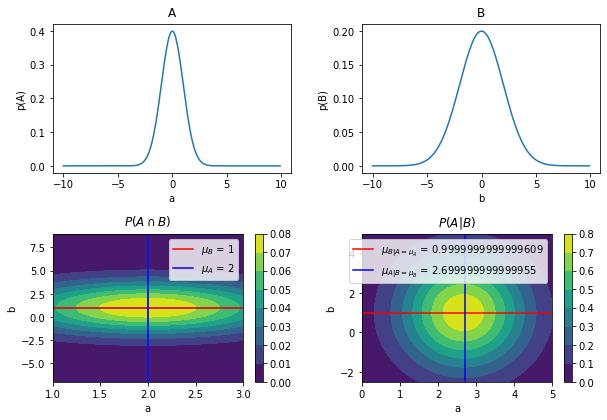

In [233]:
import numpy
from scipy.stats import norm, multivariate_normal
from  matplotlib import pyplot

# =================================
# Calculate pdf for A
mu_a = 2
sigma_a = 1
x = numpy.arange(-10, 10, 0.1)
a = norm(0, 1)
p_a = a.pdf(x)

# =================================
# Calculate pdf for B
mu_b = 1
sigma_b = 2
b = norm(0, 2)
p_b = b.pdf(x)

# =================================
# Calculate pdf for A and B
mu_a_and_b = numpy.array([mu_a, mu_b])
cov_a_and_b = 0
sigma_a_and_b = numpy.array([
    [sigma_a**2, cov_a_and_b],
    [cov_a_and_b, sigma_b**2]
])

a_and_b = multivariate_normal(mu_a_and_b, sigma_a_and_b)

xv, yv = numpy.meshgrid(x, x)
grid_coord = numpy.dstack((xv, yv))
p_a_and_b = a_and_b.pdf(grid_coord)

# =================================
# Calculate pdf for A | B
p_a_given_b = p_a_and_b / p_b

# Calculate the mean and the 
def f_a_given_b(x1, x2):
    xv1, xv2 = numpy.meshgrid(x1, x2)
    grid_coord = numpy.dstack((xv1, xv2))
    p_x1_and_x2 = a_and_b.pdf(grid_coord) 
    p_x2 = b.pdf(x1)
    return p_x1_and_x2 / p_x2

def f_b_given_a(x1, x2):
    xv2, xv1 = numpy.meshgrid(x2, x1)
    grid_coord = numpy.dstack((xv2, xv1))
    p_x1_and_x2 = a_and_b.pdf(grid_coord) 
    p_x1 = a.pdf(x2)
    return p_x1_and_x2 / p_x1

p_a_given_b_equals_mu = [f_a_given_b(i, mu_b) for i in x]
mu_a_given_b_equals_mu = x[numpy.argmax(p_a_given_b_equals_mu)]

p_b_given_a_equals_mu = [f_b_given_a(i, mu_a) for i in x]
mu_b_given_a_equals_mu = x[numpy.argmax(p_b_given_a_equals_mu)]

# =================================
# Plot

pixel_size = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(2,2, figsize=(600*pixel_size, 400*pixel_size))
fig.tight_layout(h_pad=4, w_pad=4)
ax[0][0].plot(x, p_a)
ax[0][0].set_title('A', pad=8)
ax[0][0].set_ylabel('p(A)')
ax[0][0].set_xlabel('a')
ax[0][1].plot(x, p_b)
ax[0][1].set_title('B', pad=8)
ax[0][1].set_ylabel('p(B)')
ax[0][1].set_xlabel('b')

contour = ax[1][0].contourf(xv, yv, p_a_and_b, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour, ax = ax[1][0])
ax[1][0].set_title('$ P(A \cap B)$', pad=8)
ax[1][0].set_xlim([mu_a - sigma_a**3, mu_a + sigma_a**3])
ax[1][0].set_xlabel('a')
ax[1][0].set_ylim([mu_b - sigma_b**3, mu_b + sigma_b**3])
ax[1][0].set_ylabel('b')
ax[1][0].axvline(mu_a)
ax[1][0].axhline(mu_b)
ax[1][0].axhline(mu_b, c='red', label="$\mu_B$" + " = {0}".format(mu_b))
ax[1][0].axvline(mu_a, c='blue', label="$\mu_A$" + " = {0}".format(mu_a))
ax[1][0].legend()

contour = ax[1][1].contourf(xv, yv, p_a_given_b, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour, ax = ax[1][1])
ax[1][1].set_title('$P(A|B)$', pad=8)
ax[1][1].set_xlim([0, 5])
ax[1][1].set_xlabel('a')
ax[1][1].set_ylim([-2.5, 5])
ax[1][1].set_ylabel('b')
ax[1][1].axhline(mu_b_given_a_equals_mu, c='red', label="$\mu_{B|A=\mu_A}}$" + " = {0}".format(mu_b_given_a_equals_mu))
ax[1][1].axvline(mu_a_given_b_equals_mu, c='blue', label="$\mu_{A|B=\mu_B}}$" + " = {0}".format(mu_a_given_b_equals_mu))
ax[1][1].legend()


pyplot.show()

Nowe we can assume a covariance of 0.8

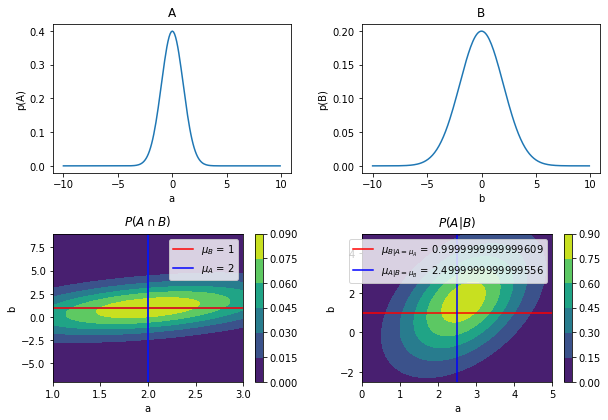

In [235]:
import numpy
from scipy.stats import norm, multivariate_normal
from  matplotlib import pyplot

# =================================
# Calculate pdf for A
mu_a = 2
sigma_a = 1
x = numpy.arange(-10, 10, 0.1)
a = norm(0, 1)
p_a = a.pdf(x)

# =================================
# Calculate pdf for B
mu_b = 1
sigma_b = 2
b = norm(0, 2)
p_b = b.pdf(x)

# =================================
# Calculate pdf for A and B
mu_a_and_b = numpy.array([mu_a, mu_b])
cov_a_and_b = 0.8
sigma_a_and_b = numpy.array([
    [sigma_a**2, cov_a_and_b],
    [cov_a_and_b, sigma_b**2]
])

a_and_b = multivariate_normal(mu_a_and_b, sigma_a_and_b)

xv, yv = numpy.meshgrid(x, x)
grid_coord = numpy.dstack((xv, yv))
p_a_and_b = a_and_b.pdf(grid_coord)

# =================================
# Calculate pdf for A | B
p_a_given_b = p_a_and_b / p_b

# Calculate the mean and the 
def f_a_given_b(x1, x2):
    xv1, xv2 = numpy.meshgrid(x1, x2)
    grid_coord = numpy.dstack((xv1, xv2))
    p_x1_and_x2 = a_and_b.pdf(grid_coord) 
    p_x2 = b.pdf(x1)
    return p_x1_and_x2 / p_x2

def f_b_given_a(x1, x2):
    xv2, xv1 = numpy.meshgrid(x2, x1)
    grid_coord = numpy.dstack((xv2, xv1))
    p_x1_and_x2 = a_and_b.pdf(grid_coord) 
    p_x1 = a.pdf(x2)
    return p_x1_and_x2 / p_x1

p_a_given_b_equals_mu = [f_a_given_b(i, mu_b) for i in x]
mu_a_given_b_equals_mu = x[numpy.argmax(p_a_given_b_equals_mu)]

p_b_given_a_equals_mu = [f_b_given_a(i, mu_a) for i in x]
mu_b_given_a_equals_mu = x[numpy.argmax(p_b_given_a_equals_mu)]

# =================================
# Plot

pixel_size = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(2,2, figsize=(600*pixel_size, 400*pixel_size))
fig.tight_layout(h_pad=4, w_pad=4)
ax[0][0].plot(x, p_a)
ax[0][0].set_title('A', pad=8)
ax[0][0].set_ylabel('p(A)')
ax[0][0].set_xlabel('a')
ax[0][1].plot(x, p_b)
ax[0][1].set_title('B', pad=8)
ax[0][1].set_ylabel('p(B)')
ax[0][1].set_xlabel('b')

contour = ax[1][0].contourf(xv, yv, p_a_and_b, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour, ax = ax[1][0])
ax[1][0].set_title('$ P(A \cap B)$', pad=8)
ax[1][0].set_xlim([mu_a - sigma_a**3, mu_a + sigma_a**3])
ax[1][0].set_xlabel('a')
ax[1][0].set_ylim([mu_b - sigma_b**3, mu_b + sigma_b**3])
ax[1][0].set_ylabel('b')
ax[1][0].axvline(mu_a)
ax[1][0].axhline(mu_b)
ax[1][0].axhline(mu_b, c='red', label="$\mu_B$" + " = {0}".format(mu_b))
ax[1][0].axvline(mu_a, c='blue', label="$\mu_A$" + " = {0}".format(mu_a))
ax[1][0].legend()

contour = ax[1][1].contourf(xv, yv, p_a_given_b, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour, ax = ax[1][1])
ax[1][1].set_title('$P(A|B)$', pad=8)
ax[1][1].set_xlim([0, 5])
ax[1][1].set_xlabel('a')
ax[1][1].set_ylim([-2.5, 5])
ax[1][1].set_ylabel('b')
ax[1][1].axhline(mu_b_given_a_equals_mu, c='red', label="$\mu_{B|A=\mu_A}}$" + " = {0}".format(mu_b_given_a_equals_mu))
ax[1][1].axvline(mu_a_given_b_equals_mu, c='blue', label="$\mu_{A|B=\mu_B}}$" + " = {0}".format(mu_a_given_b_equals_mu))
ax[1][1].legend()


pyplot.show()